<a href="https://colab.research.google.com/github/Rajathu17/Ai_based_data_leak_detection/blob/main/CY059_Data_Leakage_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Packages and Data


In [ ]:
# Import necessary modules

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Load the data
df = pd.read_csv('Data_Leakage_Detection.csv')

# Data Previewing and Analysis

In [ ]:
df.head(10)

,id,date,user,pc,Authority,Through_pwd,Through_pin,Through_MFA,Data Modification,Confidential Data Access,Confidential File Transfer,External Destination,File Operation,Data Sensitivity Level,Abnormality
0,1,07-10-14 0:54,User_0971,PC_0258,manager,0.0,0.0,1.0,0.0,0.0,1.0,internal,move,low,0
1,2,02-01-13 18:08,User_0208,PC_0307,staff,1.0,0.0,0.0,1.0,0.0,0.0,external,write,low,1
2,3,08-08-11 20:31,User_0265,PC_0259,manager,0.0,0.0,1.0,1.0,0.0,1.0,internal,write,low,0
3,4,2/26/2020 12:43,User_0178,PC_0154,staff,0.0,1.0,0.0,0.0,1.0,1.0,internal,move,high,0
4,5,3/13/2012 9:26,User_0556,PC_0095,senior manager,0.0,0.0,1.0,0.0,1.0,0.0,external,read,high,0
5,6,12/23/2019 23:34,User_0508,PC_0259,staff,0.0,0.0,1.0,0.0,1.0,1.0,external,move,medium,1
6,7,4/22/2015 2:54,User_0648,PC_0242,staff,0.0,1.0,0.0,0.0,0.0,0.0,external,read,medium,1
7,8,12/22/2018 18:47,User_0123,PC_0037,staff,1.0,1.0,1.0,0.0,NaN,0.0,external,move,high,1
8,9,01-10-21 18:02,User_0437,PC_0082,senior manager,0.0,1.0,1.0,0.0,0.0,0.0,external,delete,medium,0
9,10,4/19/2016 16:02,User_0034,PC_0340,senior manager,0.0,0.0,1.0,0.0,1.0,1.0,external,move,medium,0


In [ ]:
df.shape

(49500, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49500 entries, 0 to 49499
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          49500 non-null  int64  
 1   date                        49003 non-null  object 
 2   user                        49004 non-null  object 
 3   pc                          49002 non-null  object 
 4   Authority                   49007 non-null  object 
 5   Through_pwd                 49002 non-null  float64
 6   Through_pin                 49006 non-null  float64
 7   Through_MFA                 49147 non-null  float64
 8   Data Modification           49006 non-null  float64
 9   Confidential Data Access    49000 non-null  float64
 10  Confidential File Transfer  49005 non-null  float64
 11  External Destination        49006 non-null  object 
 12  File Operation              49006 non-null  object 
 13  Data Sensitivity Level      490

Remove missing rows

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43560 entries, 0 to 49499
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          43560 non-null  int64  
 1   date                        43560 non-null  object 
 2   user                        43560 non-null  object 
 3   pc                          43560 non-null  object 
 4   Authority                   43560 non-null  object 
 5   Through_pwd                 43560 non-null  float64
 6   Through_pin                 43560 non-null  float64
 7   Through_MFA                 43560 non-null  float64
 8   Data Modification           43560 non-null  float64
 9   Confidential Data Access    43560 non-null  float64
 10  Confidential File Transfer  43560 non-null  float64
 11  External Destination        43560 non-null  object 
 12  File Operation              43560 non-null  object 
 13  Data Sensitivity Level      43560 no

Transform column types

In [ ]:
df['date'] = pd.to_datetime(df['date'])

<ipython-input-7-e8d2d516eb0e>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [ ]:
df[['Through_pwd', 'Through_pin', 'Through_MFA', 'Data Modification', 'Confidential Data Access', 'Confidential File Transfer', 'Abnormality']] = df[['Through_pwd', 'Through_pin', 'Through_MFA', 'Data Modification', 'Confidential Data Access', 'Confidential File Transfer', 'Abnormality']].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43560 entries, 0 to 49499
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          43560 non-null  int64         
 1   date                        43560 non-null  datetime64[ns]
 2   user                        43560 non-null  object        
 3   pc                          43560 non-null  object        
 4   Authority                   43560 non-null  object        
 5   Through_pwd                 43560 non-null  int64         
 6   Through_pin                 43560 non-null  int64         
 7   Through_MFA                 43560 non-null  int64         
 8   Data Modification           43560 non-null  int64         
 9   Confidential Data Access    43560 non-null  int64         
 10  Confidential File Transfer  43560 non-null  int64         
 11  External Destination        43560 non-null  object        


# Data Preprocessing and Model Creation/Training

In [ ]:
# Data Preprocessing

# Separate features and target variable
X = df.drop(columns=['id', 'Abnormality'])
y = df['Abnormality']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Fill missing values for numeric columns with median
num_imputer = SimpleImputer(strategy="median")
X_train[numeric_cols] = num_imputer.fit_transform(X_train[numeric_cols])
X_val[numeric_cols] = num_imputer.transform(X_val[numeric_cols])

# Fill missing values for categorical columns with the most frequent value
cat_imputer = SimpleImputer(strategy="most_frequent")
X_train[categorical_cols] = cat_imputer.fit_transform(X_train[categorical_cols])
X_val[categorical_cols] = cat_imputer.transform(X_val[categorical_cols])

# Convert dates if present
if 'date' in X_train.columns:
    X_train['date'] = pd.to_datetime(X_train['date'], errors='coerce').apply(lambda x: x.toordinal() if pd.notnull(x) else np.nan)
    X_val['date'] = pd.to_datetime(X_val['date'], errors='coerce').apply(lambda x: x.toordinal() if pd.notnull(x) else np.nan)

# Apply OneHotEncoder for categorical features
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded = onehot_encoder.fit_transform(X_train[categorical_cols])
X_val_encoded = onehot_encoder.transform(X_val[categorical_cols])

# Drop original categorical columns and add encoded columns
X_train = X_train.drop(columns=categorical_cols).join(pd.DataFrame(X_train_encoded, index=X_train.index))
X_val = X_val.drop(columns=categorical_cols).join(pd.DataFrame(X_val_encoded, index=X_val.index))

# Ensure all column names are strings
X_train.columns = X_train.columns.astype(str)
X_val.columns = X_val.columns.astype(str)

# Final check for NaNs after encoding
X_train = pd.DataFrame(X_train).fillna(0)
X_val = pd.DataFrame(X_val).fillna(0)

# Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [ ]:
# Train Isolation Forest Model
isolation_forest = IsolationForest(
    n_estimators=1000,
    max_samples=0.8,
    contamination=0.2,
    max_features=0.75,
    random_state=42
)
isolation_forest.fit(X_train)

IsolationForest(contamination=0.2, max_features=0.75, max_samples=0.8,
                n_estimators=1000, random_state=42)

In [ ]:
# Predict
y_train_pred = isolation_forest.predict(X_train)
y_val_pred = isolation_forest.predict(X_val)

# Convert predictions to binary labels (1 for anomalies, 0 for normal)
y_train_pred_binary = [1 if pred == -1 else 0 for pred in y_train_pred]
y_val_pred_binary = [1 if pred == -1 else 0 for pred in y_val_pred]

In [ ]:
# Training Set Evaluation
print("Training Set Evaluation:")
print(classification_report(y_train, y_train_pred_binary, target_names=["Normal", "Anomalous"]))

# Validation Set Evaluation
print("Validation Set Evaluation:")
print(classification_report(y_val, y_val_pred_binary, target_names=["Normal", "Anomalous"]))

Training Set Evaluation:
              precision    recall  f1-score   support

      Normal       0.69      0.81      0.75     27323
   Anomalous       0.33      0.21      0.26     12277

    accuracy                           0.62     39600
   macro avg       0.51      0.51      0.50     39600
weighted avg       0.58      0.62      0.59     39600

Validation Set Evaluation:
              precision    recall  f1-score   support

      Normal       0.69      0.82      0.75      6782
   Anomalous       0.33      0.19      0.24      3118

    accuracy                           0.62      9900
   macro avg       0.51      0.51      0.50      9900
weighted avg       0.58      0.62      0.59      9900



# Auto-encoder Anomaly Detection Model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

**Preprocessing**

In [ ]:
# Load the dataset
data = pd.read_csv('Data_Leakage_Detection.csv')

# Preprocessing
num_cols = data.select_dtypes(include=['float64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

In [ ]:
# Impute missing values
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

data[num_cols] = imputer_num.fit_transform(data[num_cols])
data[cat_cols] = imputer_cat.fit_transform(data[cat_cols])

**Model**

In [ ]:
# Encode categorical columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
# Features and target
X = data.drop(columns=['Abnormality', 'id', 'date'])
y = data['Abnormality']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train only on normal data
X_normal = X_scaled[y == 0]
X_train, X_val = train_test_split(X_normal, test_size=0.2, random_state=42)

In [ ]:
# Autoencoder architecture
input_dim = X_train.shape[1]
encoding_dim = 6

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

**Train**

In [ ]:
# Train the autoencoder
history = autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_data=(X_val, X_val),
    verbose=1
)

Epoch 1/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 1.0670 - val_loss: 0.7911
Epoch 2/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.7632 - val_loss: 0.7166
Epoch 3/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.7046 - val_loss: 0.6881
Epoch 4/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6812 - val_loss: 0.6703
Epoch 5/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.6648 - val_loss: 0.6572
Epoch 6/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.6537 - val_loss: 0.6455
Epoch 7/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6402 - val_loss: 0.6342
Epoch 8/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6289 - val_loss: 0.6245
Epoch 9/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6198 - val_loss: 0.6170
Epoch 10/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6141 - val_loss: 0.6116
Epoch 11/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6089 - val_loss: 0.6076
Epoch 12/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/st

In [ ]:
# Evaluate the reconstruction error
train_loss = autoencoder.evaluate(X_train, X_train, verbose=0)
val_loss = autoencoder.evaluate(X_val, X_val, verbose=0)

print(f"Reconstruction Loss on Training Data: {train_loss:.4f}")
print(f"Reconstruction Loss on Validation Data: {val_loss:.4f}")

Reconstruction Loss on Training Data: 0.5761
Reconstruction Loss on Validation Data: 0.5769


In [ ]:
# Compute reconstruction error for all data
reconstructed = autoencoder.predict(X_scaled)
reconstruction_error = np.mean(np.square(X_scaled - reconstructed), axis=1)

# Assign labels: 0 = normal, 1 = anomaly
threshold = np.percentile(reconstruction_error[y == 0], 95)  # 95th percentile of normal data errors
y_pred = (reconstruction_error > threshold).astype(int)

# Evaluate with metrics
print("Classification Report:")
print(classification_report(y, y_pred))

# Compute AUC-ROC score
auc_score = roc_auc_score(y, reconstruction_error)
print(f"AUC-ROC Score: {auc_score:.4f}")

1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.95      0.80     34105
           1       0.30      0.05      0.08     15395

    accuracy                           0.67     49500
   macro avg       0.50      0.50      0.44     49500
weighted avg       0.57      0.67      0.58     49500

AUC-ROC Score: 0.5549


In [ ]:
# Implement Random Forest Model

# Preprocessing
# Drop irrelevant columns
X_rf = df.drop(columns=['id', 'date', 'Abnormality'])
y_rf = df['Abnormality']

# Label encode categorical features
categorical_cols_rf = X_rf.select_dtypes(include=['object']).columns
label_encoders_rf = {}
for col in categorical_cols_rf:
    le = LabelEncoder()
    X_rf[col] = le.fit_transform(X_rf[col])
    label_encoders_rf[col] = le

# Fill missing values for categorical with 'Missing' (after encoding, this will be a numerical representation)
# Fill missing values for numerical with median
numeric_cols_rf = X_rf.select_dtypes(include=np.number).columns
num_imputer_rf = SimpleImputer(strategy="median")
X_rf[numeric_cols_rf] = num_imputer_rf.fit_transform(X_rf[numeric_cols_rf])

# For the categorical columns that were label encoded, missing values are already handled by the imputation strategy on the numerical representation.

# Convert the target column (Abnormality) to numeric (already done in previous steps, but reaffirming)
y_rf = y_rf.astype(int)

# Model Training & Evaluation
# Split data into train/test sets with stratification
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42, stratify=y_rf)

# Train a RandomForestClassifier with balanced class weights
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

random_forest_model = RandomForestClassifier(class_weight='balanced', random_state=42)
random_forest_model.fit(X_train_rf, y_train_rf)

# Predict
y_pred_rf = random_forest_model.predict(X_test_rf)
y_pred_proba_rf = random_forest_model.predict_proba(X_test_rf)[:, 1]

# Evaluate performance
print("Random Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test_rf, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test_rf, y_pred_proba_rf))
print("\nClassification Report:")
print(classification_report(y_test_rf, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_rf, y_pred_rf))

Random Forest Model Evaluation:
Accuracy: 0.7041414141414142
ROC AUC: 0.7367935857487663

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      6821
           1       0.53      0.43      0.48      3079

    accuracy                           0.70      9900
   macro avg       0.65      0.63      0.64      9900
weighted avg       0.69      0.70      0.70      9900


Confusion Matrix:
[[5635 1186]
 [1743 1336]]


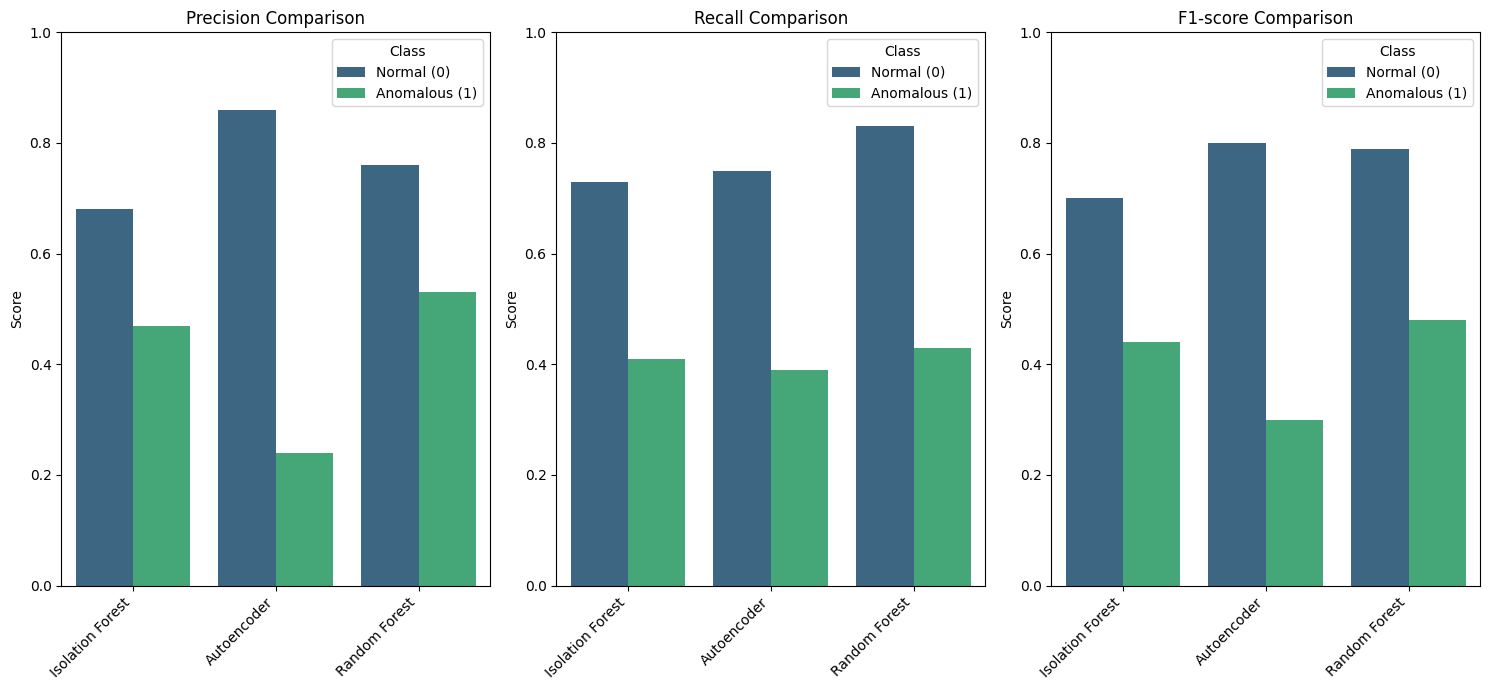

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract metrics from the classification reports
data = {
    'Model': ['Isolation Forest', 'Isolation Forest', 'Autoencoder', 'Autoencoder', 'Random Forest', 'Random Forest'],
    'Class': ['Normal (0)', 'Anomalous (1)', 'Normal (0)', 'Anomalous (1)', 'Normal (0)', 'Anomalous (1)'],
    'Precision': [0.68, 0.47, 0.86, 0.24, 0.76, 0.53],
    'Recall': [0.73, 0.41, 0.75, 0.39, 0.83, 0.43],
    'F1-score': [0.70, 0.44, 0.80, 0.30, 0.79, 0.48]
}

metrics_df = pd.DataFrame(data)

# Reshape the data for plotting
metrics_melted = metrics_df.melt(id_vars=['Model', 'Class'], var_name='Metric', value_name='Score')

# Create the plots
plt.figure(figsize=(15, 7))

# Plot Precision
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='Score', hue='Class', data=metrics_melted[metrics_melted['Metric'] == 'Precision'], palette='viridis')
plt.title('Precision Comparison')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Class')

# Plot Recall
plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='Score', hue='Class', data=metrics_melted[metrics_melted['Metric'] == 'Recall'], palette='viridis')
plt.title('Recall Comparison')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Class')

# Plot F1-score
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='Score', hue='Class', data=metrics_melted[metrics_melted['Metric'] == 'F1-score'], palette='viridis')
plt.title('F1-score Comparison')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Class')

plt.tight_layout()
plt.show()

<ipython-input-22-e0b2828140d6>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=comparison_df, palette='viridis') # Use a color palette


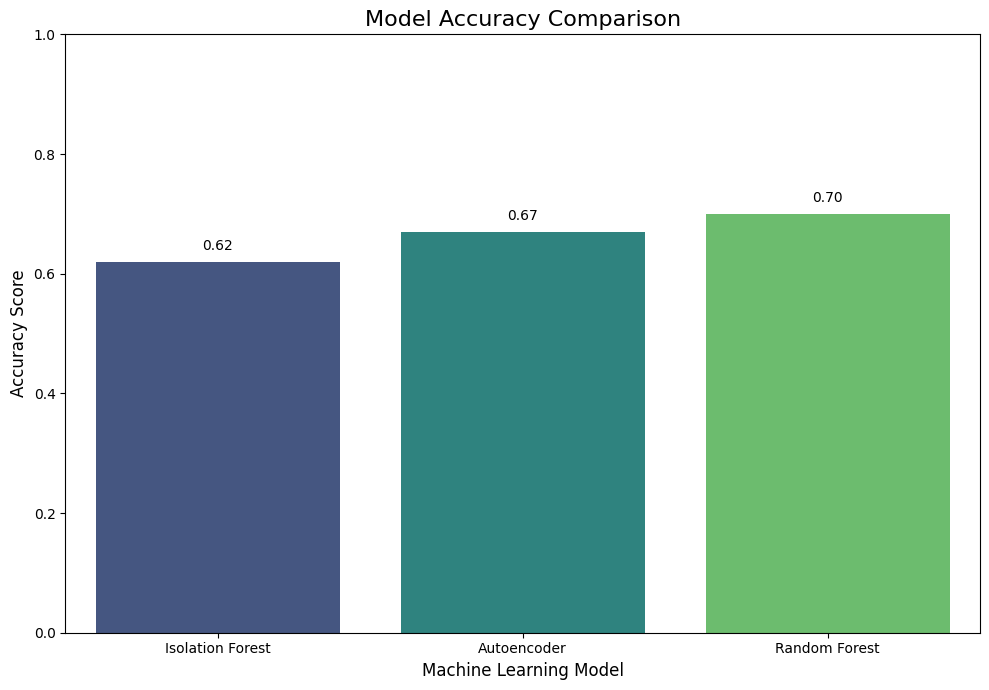

In [ ]:
# Extract the accuracy scores from the classification reports
# You need to replace the placeholder values with the actual accuracy scores
isolation_forest_accuracy = 0.62
autoencoder_accuracy = 0.67 # From the autoencoder classification report
random_forest_accuracy = 0.70

# Create a DataFrame for plotting
model_names = ['Isolation Forest', 'Autoencoder', 'Random Forest']
accuracy_scores = [isolation_forest_accuracy, autoencoder_accuracy, random_forest_accuracy]

comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores
})

# Create the bar plot with improved aesthetics
plt.figure(figsize=(10, 7)) # Increase figure size for better readability
sns.barplot(x='Model', y='Accuracy', data=comparison_df, palette='viridis') # Use a color palette
plt.title('Model Accuracy Comparison', fontsize=16) # Increase title font size
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for accuracy
plt.ylabel('Accuracy Score', fontsize=12) # Increase y-axis label font size
plt.xlabel('Machine Learning Model', fontsize=12) # Add x-axis label
plt.xticks(rotation=0) # Ensure x-axis labels are not rotated

# Add accuracy values on top of the bars for clarity
for index, row in comparison_df.iterrows():
    plt.text(index, row['Accuracy'] + 0.02, f'{row["Accuracy"]:.2f}', color='black', ha="center", fontsize=10)

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()